# 🥱 LangGraph 入門教程：解析 AI 代理工作流程

你是否聽說過 LangChain 和 LangChain ? 它們能夠利用大型語言模型(LLMs)自主地自動化各種工作流程。但是,當我們面對複雜的條件流程或需要整合多個工作流時,傳統的 LangChain 可能就不太適用了。這就是 LangGraph 登場的時候。

LangGraph 是 LangChain 團隊開發的一個套件,旨在創建更靈活、更複雜的工作流程。它允許我們將工作流程視覺化為圖形,大大增強了我們處理複雜場景的能力。讓我們一起探索 LangGraph 的世界吧!

❤️ Created by [hengshiousheu](https://huggingface.co/Heng666).

## 環境建置

### 安裝套件包

在本演練中，我們將使用以下套件：

In [ ]:
%%capture --no-stderr
%pip install --upgrade --quiet langchain
%pip install --upgrade --quiet langchain-openai
%pip install --upgrade --quiet langgraph
%pip install --upgrade --quiet langchain-community

我們需要設置 環境變數 OPENAI_API_KEY ，可以直接完成，如下所示：

In [ ]:
import os
import getpass
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

📌 實用提示：確保所有環境變數都正確設置，這對於順利運行後續程式碼至關重要。

## LangGraph 是什麼?

想像你正在開發一個全方位的客戶服務 AI 系統。這個系統需要處理多種任務：回答產品問題、處理退貨請求、發送訂單更新,甚至生成個性化的促銷郵件。使用傳統的 LangChain 方法,你可能會為每個任務創建單獨的代理或工具。但是,當這些任務需要相互協作時,問題就出現了。

例如,一個簡單的客戶查詢可能演變成一系列複雜的操作：
1. 檢查訂單狀態
2. 如果訂單延遲,生成道歉信
3. 同時啟動退款流程
4. 最後,發送一個個性化的折扣碼來挽留客戶

LangChain 在處理這種複雜、交互的工作流時會遇到困難。它的線性執行模式難以應對需要根據不同條件跳轉到不同任務的場景。此外,在 LangChain 中重複使用先前任務的輸出或維護跨多個步驟的狀態也不太容易。

這就是 LangGraph 的優勢所在。LangGraph 將你的整個工作流程視覺化為一個圖形：
- 每個任務（如檢查訂單、生成郵件、處理退款）都是圖中的一個節點
- 節點之間的連接（邊）定義了任務的執行順序和條件
- 整個系統共享一個狀態,使得信息可以在不同任務間無縫傳遞

![圖片：客戶服務工作流程圖示例](https://i.imgur.com/A21aMFL.png)

使用 LangGraph,你可以輕鬆定義複雜的條件路徑（例如,只有在訂單延遲時才發送道歉信）,創建循環（比如在客戶不滿意時重複提供解決方案）,甚至並行執行多個任務。這種靈活性使得構建真正智能、響應迅速的 AI 系統成為可能。

## LangChain vs LangGraph：關鍵區別

讀到這裡，你可能會想：「LangGraph 聽起來很強大，但它與 LangChain 到底有什麼不同？」讓我們快速梳理一下關鍵區別：

1. 工作流結構：
   - LangChain：主要是線性的，適合順序執行的任務。
   - LangGraph：基於圖的結構，適合複雜、非線性的工作流。

2. 靈活性：
   - LangChain：在處理條件分支和循環時較為受限。
   - LangGraph：可以輕鬆定義條件路徑、循環和並行任務。

3. 狀態管理：
   - LangChain：在跨多個步驟維護狀態時可能遇到困難。
   - LangGraph：提供了一個共享的狀態系統，方便在整個工作流中傳遞信息。

4. 可視化：
   - LangChain：工作流程可能不太直觀。
   - LangGraph：將工作流視覺化為圖，使複雜系統更易於理解和設計。

5. 使用場景：
   - LangChain：適合相對簡單、直接的 AI 任務。
   - LangGraph：適合需要複雜決策和多路徑執行的高級 AI 系統。

記住，LangGraph 並不是要取代 LangChain，而是對其進行補充和擴展。在許多情況下，你可能會發現將兩者結合使用是最佳選擇。

## LangGraph 的核心元件

LangGraph 通過專注於四個主要元件來簡化 AI 代理開發：

1. **圖形(Graph)**: 這是 LangGraph 的核心，就像一張路線圖，包含了所有的節點和它們之間的連接。

2. **狀態(State)**: 想像這是一個共享的記事本，記錄了整個過程中的重要信息。每個節點都可以讀寫這個記事本。

3. **節點(Node)**: 這些是圖中的各個站點，每個站點都代表一個特定的任務或檢查點。

4. **邊(Edge)**: 這些是連接節點的路徑，決定了信息如何從一個節點流向另一個節點。

LangGraph 就像一個郵件配送中心。郵件（狀態）在不同的工作站（節點）之間傳遞，根據特定的規則（邊）決定下一步去哪裡。當整個系統啟動時，所有的節點都在等待，直到收到相應的資訊才開始工作。

這種設計讓我們能夠構建出既靈活又強大的 AI 工作流程。

### 節點(Node)：工作流程的基石

在 LangGraph 中，節點就像是工作流程中的專業人員，每個都有自己的特定任務。想像一下一個高效的工廠：

每個節點都是一個工作站，負責接收原材料（輸入），進行加工（處理），然後產出成品（輸出）。這些「工作站」可以執行各種操作，從簡單的資料轉換到複雜的下達決策。

讓我們通過一個簡單的例子來看看節點是如何工作的：

In [ ]:
def function1(input_1):
  return input_1 + " Function1處理完畢"

def function2(input_2):
  return input_2 + " Function2處理完畢"

這裡，`function1` 和 `function2` 就像兩個不同的工作站。它們各自接收一個輸入，進行一些處理，然後返回結果。

現在，我們來看看如何將這些「工作站」添加到我們的 LangGraph「工廠」中：

In [ ]:
from langgraph.graph import Graph

# 定義一個圖
graph = Graph()

graph.add_node("node_1", function1)
graph.add_node("node_2", function2)

通過 `add_node` 方法，我們將這些功能集成到我們的工作流程圖中。每個節點都有一個唯一的名稱（如 "node_1"），這樣我們就可以在後續的工作流程中明確地引用它們。

你能想像這些節點如何在更複雜的場景中工作嗎？比如，在客戶服務系統中，一個節點可能負責分析客戶查詢的情緒，而另一個節點則根據這個分析決定最佳的回應策略。

讓我們繼續介紹下一個重要的概念：邊（Edge）。

### 邊(Edge)：連接節點的橋樑

在 LangGraph 中，邊就像是工作流程中的傳送帶或決策點。它們定義了信息如何在節點之間流動，以及在什麼條件下流動。想像一下一個複雜的物流系統：

邊決定了包裹（在我們的案例中是數據或狀態）應該送到哪個下一站。有時候這是一個簡單的直線運輸，有時候則需要根據包裹的特性做出決策。

LangGraph 提供了幾種類型的邊，讓我們來看看：

### 普通邊(Simple Edge)

邊定義了節點之間的連接,決定了圖中執行的流程。它們指定了一個節點的輸出如何作為輸入傳遞給另一個節點。邊可以是普通的(直接連接兩個節點)或條件的(根據某些標準路由到不同的節點)。

最基本的邊,直接連接兩個節點。使用 `add_edge` 方法來添加:


In [ ]:
graph.add_edge('node_1', 'node_2')

這行程式碼告訴系統，'node_1' 完成處理後，訊息應該直接傳送到 'node_2'。

#### 入口點(Entry Point)和終點(End Point)

入口點是圖開始執行時運行的第一個節點。我們使用 START 節點來指定圖的入口:

In [ ]:
from langgraph.graph import START
from langgraph.graph import END

graph.add_edge(START, "node_a")
graph.add_edge("node_2", END)

這就像是在說："工作從這裡開始，到那裡結束"。

### 條件邊(Conditional Edge)

條件邊允許我們根據特定條件選擇下一個執行的節點。使用 `add_conditional_edges` 方法來添加:


In [ ]:
def where_to_go(state):
  # Your Logic here
  if state['Condition']:
    return "end"
  else:
    return "continue"

# agent node is connected with 2 nodes END and weather_tool
graph.add_conditional_edges('agent',where_to_go,{
    "end": END,
    "continue": "weather_tool"
})

### 狀態(state)：消息的共享中心

在 LangGraph 中,狀態是捕獲應用程序當前快照的共享資料結構。它可以是任何 Python 類型,但通常是 TypedDict 或 Pydantic BaseModel。狀態使節點能夠相互通信和交換訊息

有兩種類型的圖可以在 LangGraph 中創建::

- 基本圖(Basic Graph): 只能將一個節點的輸出傳遞給下一個節點。因為無法包含狀態
- 有狀態圖圖(Stateful Graph): 可以包含在節點之間傳遞的狀態,並且可以在任何節點訪問此狀態。

這裡是如何定義狀態並將其傳遞給有狀態圖的範例:

In [ ]:
import operator
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph

class AllState(TypedDict):
    messages: Annotated[list[str], operator.add]

graph = StateGraph(AllState)

在這個例子中,我們使用 TypedDict 定義了一個包含 `messages` 鍵的字典。該鍵預期持有一個字符串列表。我們使用 `operator.add` 函數作為 reducer,這意味著當新消息被添加到列表時,它們將與現有消息組合。


### 圖(Graph): LangGraph 的核心結構

LangGraph 的核心是將代理工作流程建模為圖，你可以制定你的 AI 代理行為，使用上面介紹的關鍵元素：

> 喔對了，LangGraph 還有個特別的 `MessageGraph` 類別。這種圖的狀態就只是一串訊息列表。雖然主要用在聊天機器人上，但大多數應用可能需要更複雜的狀態結構。

想要開始打造你的 LangGraph 嗎？來看看這個簡單的範例：

In [ ]:
class AllState(TypedDict):
    messages: Annotated[list[str], operator.add]

graph = StateGraph(AllState)
app = graph.compile()

## 實戰應用：天氣查詢 Agent

現在我們了解了 langgraph 及其元件，然後讓我們使用 langgraph 建立一個基本工作流程。我們將創建一個天氣助手，它可以為我們提供任何位置的天氣資訊，讓我們通過一個實際的例子來了解運作機制：

最後我們會實現出以下工作流程圖
![簡易圖](https://i.imgur.com/OV96KYj.png)

首先先來建立整張圖的狀態，我們將創建一種稱為「Messages」的狀態，它將儲存整個工作流程中發生的所有對話。所以讓我們先創建它！

In [ ]:
from typing import TypedDict, Annotated, Sequence
import operator
class AllState(TypedDict):
    messages: Annotated[Sequence[str], operator.add]

我們將創建一個節點，該節點將接受用戶輸入並從用戶的查詢中提取城市名稱，並將其傳遞到下一個節點

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0.4)
prompt_str = """
You are given one question and you have to extract city name from it
Don't respond anything except the city name and don't reply anything if you can't find city name
Only reply the city name if it exists or reply 'no_response' if there is no city name in question

  Here is the question:
  {user_query}
"""
prompt = ChatPromptTemplate.from_template(prompt_str)

chain = prompt | model
res = chain.invoke({"user_query": "請問高雄天氣如何?"})
res.content

'高雄'

接著創造另一個節點，這邊模擬函數可以回傳該城市的天氣狀況，實務上你可以接提供服務的 API，力如 openWeather 就可行。

In [ ]:
def get_taiwan_weather(city: str) -> str:
    """查詢台灣特定城市的天氣狀況。"""
    weather_data = {
        "台北": "晴天，溫度28°C",
        "台中": "多雲，溫度26°C",
        "高雄": "陰天，溫度30°C"
    }
    return f"{city}的天氣：{weather_data.get(city, '暫無資料')}"

res = get_taiwan_weather(res.content)
res

'高雄的天氣：陰天，溫度30°C'

函數都確認可行後，讓我們轉成節點

In [ ]:
def call_model(state: AllState):
    messages = state["messages"]
    response = chain.invoke(messages)
    return {"messages": [response]}

def weather_tool(state):
  context = state["messages"]
  city_name = context[1].content
  data = get_taiwan_weather(city_name)
  return {"messages": [data]}

快速建立圖，將剛剛特兩個節點做連接


In [ ]:
graph_builder = StateGraph(AllState)

graph_builder.add_node("agent", call_model)
graph_builder.add_node("weather", weather_tool)

# Connecting 2 nodes
graph_builder.add_edge('agent', 'weather')

graph_builder.set_entry_point("agent")
graph_builder.set_finish_point("weather")

app = graph_builder.compile()

In [ ]:
init_state = {"messages": ["想知道高雄天氣如何？"]}
response = app.invoke(init_state)
response['messages'][-1]

'高雄的天氣：陰天，溫度30°C'

可以視覺化查看結果圖

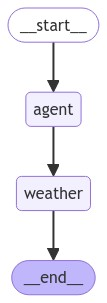

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

看起來目前一切都很優質，另一個問題是，Agent 目前只能回答關於天氣的事項，沒有辦法回答其他內容，例如：李多慧今年幾歲？按照既有流程會直接交給天氣函數去做查詢，然後一切都會爆炸，因此我們需要處理這個議題。

如果我們有條件地運行天氣工具會怎麼樣？ 🤔，表示我們只會在使用者詢問天氣資訊時運行該工具，否則我們不會做出任何回應。這是我們需要創建條件邊的地方，所以讓我們創建一個！

![img](https://i.imgur.com/KPN6sOH.png)

繼續往下開始編寫

In [ ]:
from langgraph.graph import Graph, END

# Defining condition function
def query_classify(state: AllState):
  messages = state["messages"]
  ctx = messages[0]
  if ctx == "no_response":
    return "end"
  else:
    return "continue"

In [ ]:
graph_builder = StateGraph(AllState)

graph_builder.add_node("agent", call_model)
graph_builder.add_node("weather", weather_tool)

graph_builder.set_entry_point("agent")

# Create an conditional edge
graph_builder.add_conditional_edges('agent',query_classify,{
    "end": END,
    "continue": "weather"
})


app = graph_builder.compile()

In [ ]:
init_state = {"messages": ["想知道杜拜天氣如何？"]}
response = app.invoke(init_state)
response['messages'][-1]

'no_response的天氣：暫無資料'

哎呀，怎麼還是不對，看來我們需要用一個回應節點來處理最後輸出的結果

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0.4)
response_prompt_str = """
  You have given a weather information and you have to respond to user's query based on the information

  Here is the user query:
  ---
  {user_query}
  ---

  Here is the information:
  ---
  {information}
  ---
  """
response_prompt = ChatPromptTemplate.from_template(response_prompt_str)

response_chain = response_prompt | model
res = response_chain.invoke({
    "user_query": "請問杜拜天氣如何?",
    "information": "no_response的天氣：暫無資料"
    })
res.content

'抱歉，目前沒有杜拜的天氣資料。您可以稍後再詢問或查詢其他天氣資訊。感謝您的理解。'

將剛剛建立好的回應函數轉換成節點

In [ ]:
def responder(state: AllState):
    messages = state["messages"]
    response = response_chain.invoke({
        "user_query": messages[0],
        "information": messages[1]
    })
    return {"messages": [response]}

重新編譯整張圖

In [ ]:
graph_builder = StateGraph(AllState)

graph_builder.add_node("agent", call_model)
graph_builder.add_node("weather", weather_tool)
graph_builder.add_node("responder", responder)

graph_builder.set_entry_point("agent")

# Create an conditional edge
graph_builder.add_conditional_edges('agent',query_classify,{
    "end": "responder",
    "continue": "weather"
})
graph_builder.add_edge("weather", "responder")
graph_builder.add_edge("responder", END)



app = graph_builder.compile()

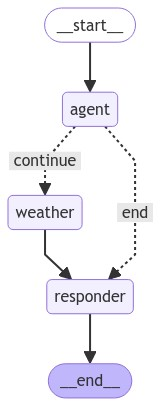

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

再次視覺化比較流程

In [ ]:
init_state = {"messages": ["想知道杜拜天氣如何？"]}
response = app.invoke(init_state)
response['messages'][-1].content

'抱歉，我無法提供杜拜的天氣信息。如果您需要天氣預報，建議您查詢天氣預報網站或使用天氣應用程式以獲取最新信息。祝您有個愉快的一天！'

現在，如果我們問「你好嗎？」之類的問題然後它會用“no_response”響應而不是拋出錯誤，如果您詢問有關天氣資訊的問題，那麼它將使用天氣工具並用響應器響應🚀！

##結論

在這篇深入淺出的指南中，我們剖析了 LangGraph 的核心要素：節點（Nodes）、邊（Edges）和狀態（State）。這些元素就像是構建智能系統的積木，讓我們能夠打造出靈活多變的 AI 應用。

我們透過實際案例，展示了如何運用這些元素來構建一個簡單卻功能強大的圖形結構。節點，就像是系統中的專業處理單元，各司其職；邊則扮演著智能交通管理員的角色，引導資訊流的方向；而狀態，則是整個系統的共享記憶體，確保各個節點能夠無縫協作。

這種模塊化的設計理念，不僅提高了系統的可擴展性，更為複雜 AI 應用的開發鋪平了道路。我們期待在未來的系列文章中，能夠帶領大家探索更多進階應用場景，充分發揮 LangGraph 的潛力，一起推動 AI 技術的創新發展。讓我們拭目以待，看看 LangGraph 將如何重塑智能系統的未來！

## X.參考資料

1. https://langchain-ai.github.io/langgraph/concepts/low_level/#messagesstate
2. https://readmedium.com/en/https:/medium.com/@kbdhunga/beginners-guide-to-langgraph-understanding-state-nodes-and-edges-part-1-897e6114fa48
3. https://www.ionio.ai/blog/a-comprehensive-guide-about-langgraph-code-included#what-is-langgraph